# Iris species classification with Linear Support Vector Machines

A support vector machine (SVM) is a **non-probabilistic** supervised machine learning model that uses classification algorithms for two-group classification problems. The non-probabilistic aspect is its key strength, in contrast with a probabilistic classifier, such as The Naive Bayes. In essence, an SVM separates data across decision boundaries, determined by only a small subset of the feature vectors (data or ponts in the feature space). The data subset that supports the decision boundary are called **support vectors**. The decision boundaries are found by determining a hyperplane placed in the middle of the decision boundaries. See the Figure below:



![](http://)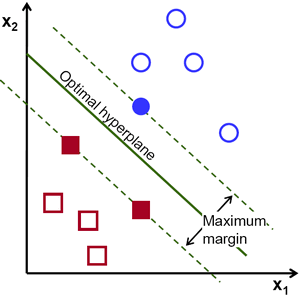

In order to find the optimal hyperplane (that is, best positioned so it can help classify efficiently by determining the best decision boundaries), it is necessary to maximise the distance between the hyperplane and the support vectors, a maximum margin, as shown in the Figure above. A test point is then classified by comparing its relative position with respect to the hyperplane.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [ ]:
df_iris=pd.read_csv('../input/iris/Iris.csv')
df_iris.head()

Histograms of petal lengths by species

In [ ]:
setosa=df_iris.iloc[:50,:]
versicolor=df_iris.iloc[50:100,:]
virginica=df_iris.iloc[100:150,:]

sns.distplot(a=setosa['PetalLengthCm'], label="Iris-setosa")
sns.distplot(a=versicolor['PetalLengthCm'], label="Iris-versicolor" )
sns.distplot(a=virginica['PetalLengthCm'], label="Iris-virginica")

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

For simplicity, we will onlt discriminate between **Iris Setosa** and **Iris Versicolor**, so a dataframe with this data only is created. Also, only two features will be considered: Sepal Width and Petal Length. So the feature space is 2-dimensional, and the hyperplane will be a line. In the case of an N-Dimensional feature space, the hyperplane will be (N-1)-Dimensional. 

In [ ]:
df=df_iris.iloc[:100,2:4]

A plot to see the distribution of **Iris Setosa** and **Iris Versicolor**

In [ ]:
g=sns.jointplot(x=df_iris['SepalWidthCm'], y=df_iris['PetalLengthCm'],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=5, linewidth=1)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Sepal$ $Width$ $(cm)$", "$Petal$ $Length$ $(cm)$");

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray), but not dataframes. The array X containing the features is created.

In [ ]:
X=df.to_numpy()

Converting string value to int type for labels
Setosa = 0
Versicolor = 1

In [ ]:
y=df_iris.iloc[:100,-1]
y = LabelEncoder().fit_transform(y)

The model is trained by splitting the data into train and test subsets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svc = LinearSVC()
model_fit=svc.fit(X_train, y_train)

Finding the support vectors:

In [ ]:
decision_function = model_fit.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

The following plot shows the training vectors, the decision boundaries and the hyperplane. The support vectors are encircled in red.

In [ ]:
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Train vectors and support vectors')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='r')

In [ ]:
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Test vectors')

The confusion Matrix:

In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))


From 25 test vectors, all of them were correctly classified. So our simple linear SVM model works great! The SVM method becomes evidently powerful when facing large datasets with a large number of features.